Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.


[[0. 1.]
 [2. 1.]
 [3. 1.]
 [5. 1.]]
0.8615384615384615 -1.8038461538461532


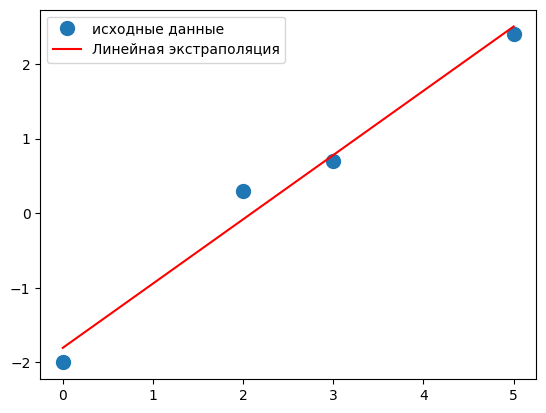

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 2, 3, 5])
y = np.array([-2, 0.3, 0.7, 2.4])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()


Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных

[0.99693669 2.00189228]
2.0498173710985936e-06
0.049286055982907764


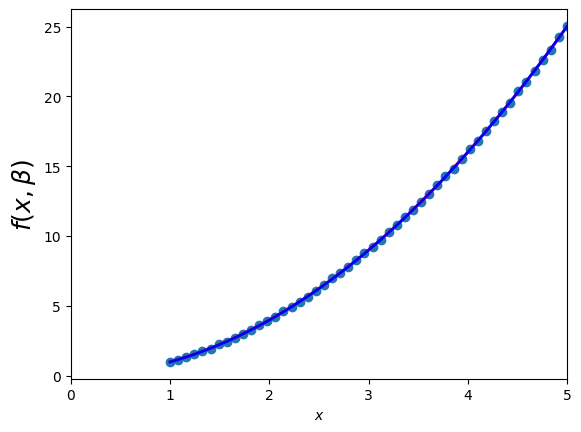

In [ ]:
from scipy.optimize import curve_fit

beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

26780.09915062818
[9312.57512673]


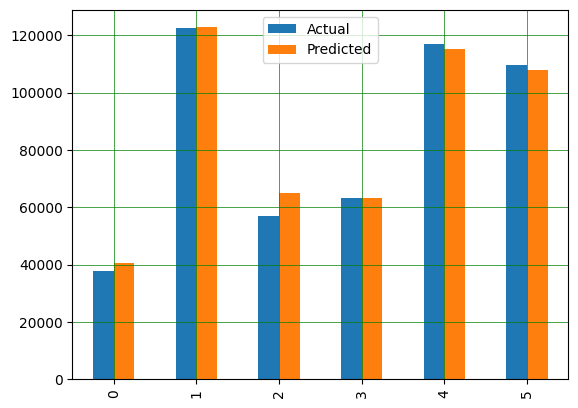

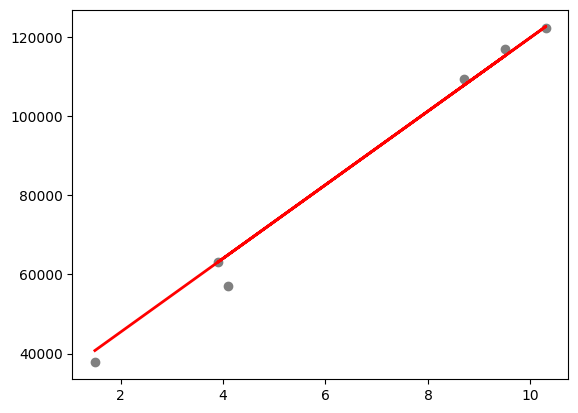

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file = pd.read_csv(
    'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
X = file.iloc[:, :-1].values
y = file.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv


In [ ]:
file = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
X = file.iloc[:, :-1].values
y = file.iloc[:, 1].values

df1 = pd.DataFrame(y)
df2 = pd.DataFrame(X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3,3,4,5,6,7,8,9,10
0,0.70,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,0.88,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,0.76,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,0.28,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,0.70,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.


In [ ]:
import numpy as np

x = [2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
y = [4.0, 2.0, 4.0, 2.0, 5.0, 2.0]
new_y = np.array(y)
new_x = np.array(x)
A = np.vstack([new_x, np.ones(len(new_x))]).T
A

array([[2. , 1. ],
       [2.2, 1. ],
       [2.4, 1. ],
       [2.6, 1. ],
       [2.8, 1. ],
       [3. , 1. ]])

In [ ]:
m, c = np.linalg.lstsq(A, new_y, rcond=None)[0]
print(m, c)

-0.42857142857143055 4.3809523809523805


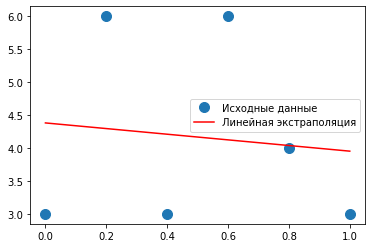

In [ ]:
import matplotlib.pyplot as plt

plt.plot(new_x, new_y, 'o', label='Исходные данные', markersize=10)
plt.plot(new_x, m * new_x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()


[3.  3.2 3.4 3.6 3.8 4. ]
[6. 2. 6. 4. 3. 4.]
-0.0023516 0.19277 -0.68789


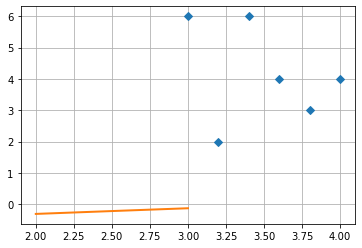

In [ ]:
from numpy import *
from numpy.random import *

print(new_x)
print(new_y)
m = vstack((new_x ** 2, new_x, ones(6))).T
s = np.linalg.lstsq(m, new_y, rcond=None)[0]
s = [-0.0023516, 0.19277, -0.68789]
x_prec = linspace(2, 3, 11)
plt.plot(new_x, new_y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
print(s[0], s[1], s[2])
plt.savefig('парабола.png')